<a href="https://colab.research.google.com/github/Dhenielc15/CCMACLRL_EXERCISES_COM221ML/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
pip install numpy opencv-python scikit-learn

In [62]:
import pandas as pd
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


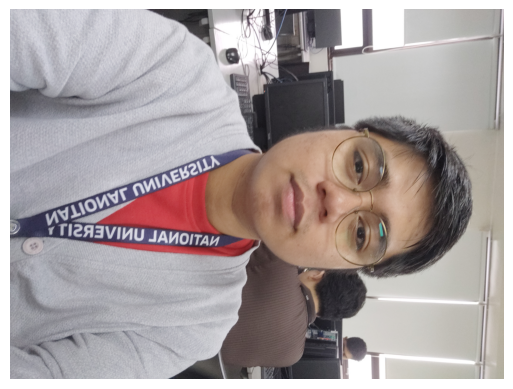

In [64]:
image_path = '/content/drive/My Drive/Images/DHENIELC15/1728545577990.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

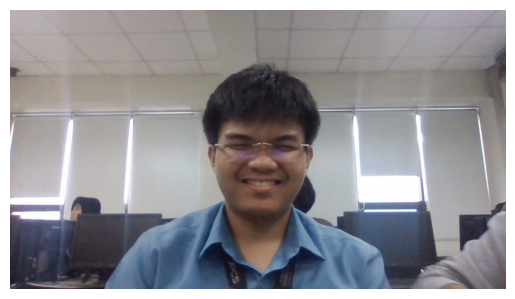

In [65]:
image_path = '/content/drive/My Drive/Images/Brando/4.jpg'  # Change this to your file's path

# Open the image
image = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axes for cleaner display
plt.show()

In [66]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Images/')

In [67]:
images.shape

(42, 10000)

In [68]:
labels.shape

(42,)

In [69]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [70]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=42)

In [71]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

In [72]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [76]:
import cv2  # Make sure to import cv2

def predict_image(img_path, model):
    img = cv2.imread(img_path)

    # Check if image is loaded successfully
    if img is None:
        print(f"Error: Could not load image at path: {img_path}")
        return None  # Or handle the error appropriately

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction

# Example usage
result = predict_image('/content/drive/My Drive/TEST/1728547325952.jpg', model)
print(f'Predicted label:', result)

Predicted label: [0]


In [75]:
import cv2  # Make sure to import cv2

def predict_image(img_path, model):
    img = cv2.imread(img_path)

    # Check if image is loaded successfully
    if img is None:
        print(f"Error: Could not load image at path: {img_path}")
        return None  # Or handle the error appropriately

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction

# Example usage
result = predict_image('/content/drive/My Drive/Images/Brando/4.jpg', model)
print(f'Predicted label:', result)

Predicted label: [1]


In [77]:
	#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0
